In [1]:
%pip install stop-words
%pip install razdel
%pip install wordcloud
%pip install wikipedia

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import razdel
import wikipedia
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from stop_words import get_stop_words
from PIL import Image
stoplist = get_stop_words('russian')
from pymorphy2 import MorphAnalyzer
import numpy as np
shape = np.array(Image.open('/ylt.jpg'))

In [3]:
wikipedia.set_lang("ru")
wiki = wikipedia.page('Якутия')
text = wiki.content

In [ ]:
from razdel import sentenize, tokenize
text = re.sub(r'==.*?==+', '', text)
text = re.sub(',', ' ', text)
text = text.replace('\n', '')
text_generator = sentenize(text)
print(next(text_generator))
print(next(text_generator))
list(tokenize(text))


In [5]:
morph = MorphAnalyzer()
morph.parse(next(tokenize(text)).text)

[Parse(word='респу́блика', tag=OpencorporaTag('NOUN,inan,masc sing,gent'), normal_form='респу́блик', score=0.5, methods_stack=((DictionaryAnalyzer(), 'блика', 19, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'спу́'), (KnownPrefixAnalyzer(known_prefixes=<...>, min_remainder_length=3, score_multiplier=0.75), 'ре'))),
 Parse(word='респу́блика', tag=OpencorporaTag('NOUN,anim,femn,Name sing,nomn'), normal_form='респу́блика', score=0.5, methods_stack=((DictionaryAnalyzer(), 'лика', 191, 0), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'спу́б'), (KnownPrefixAnalyzer(known_prefixes=<...>, min_remainder_length=3, score_multiplier=0.75), 'ре')))]

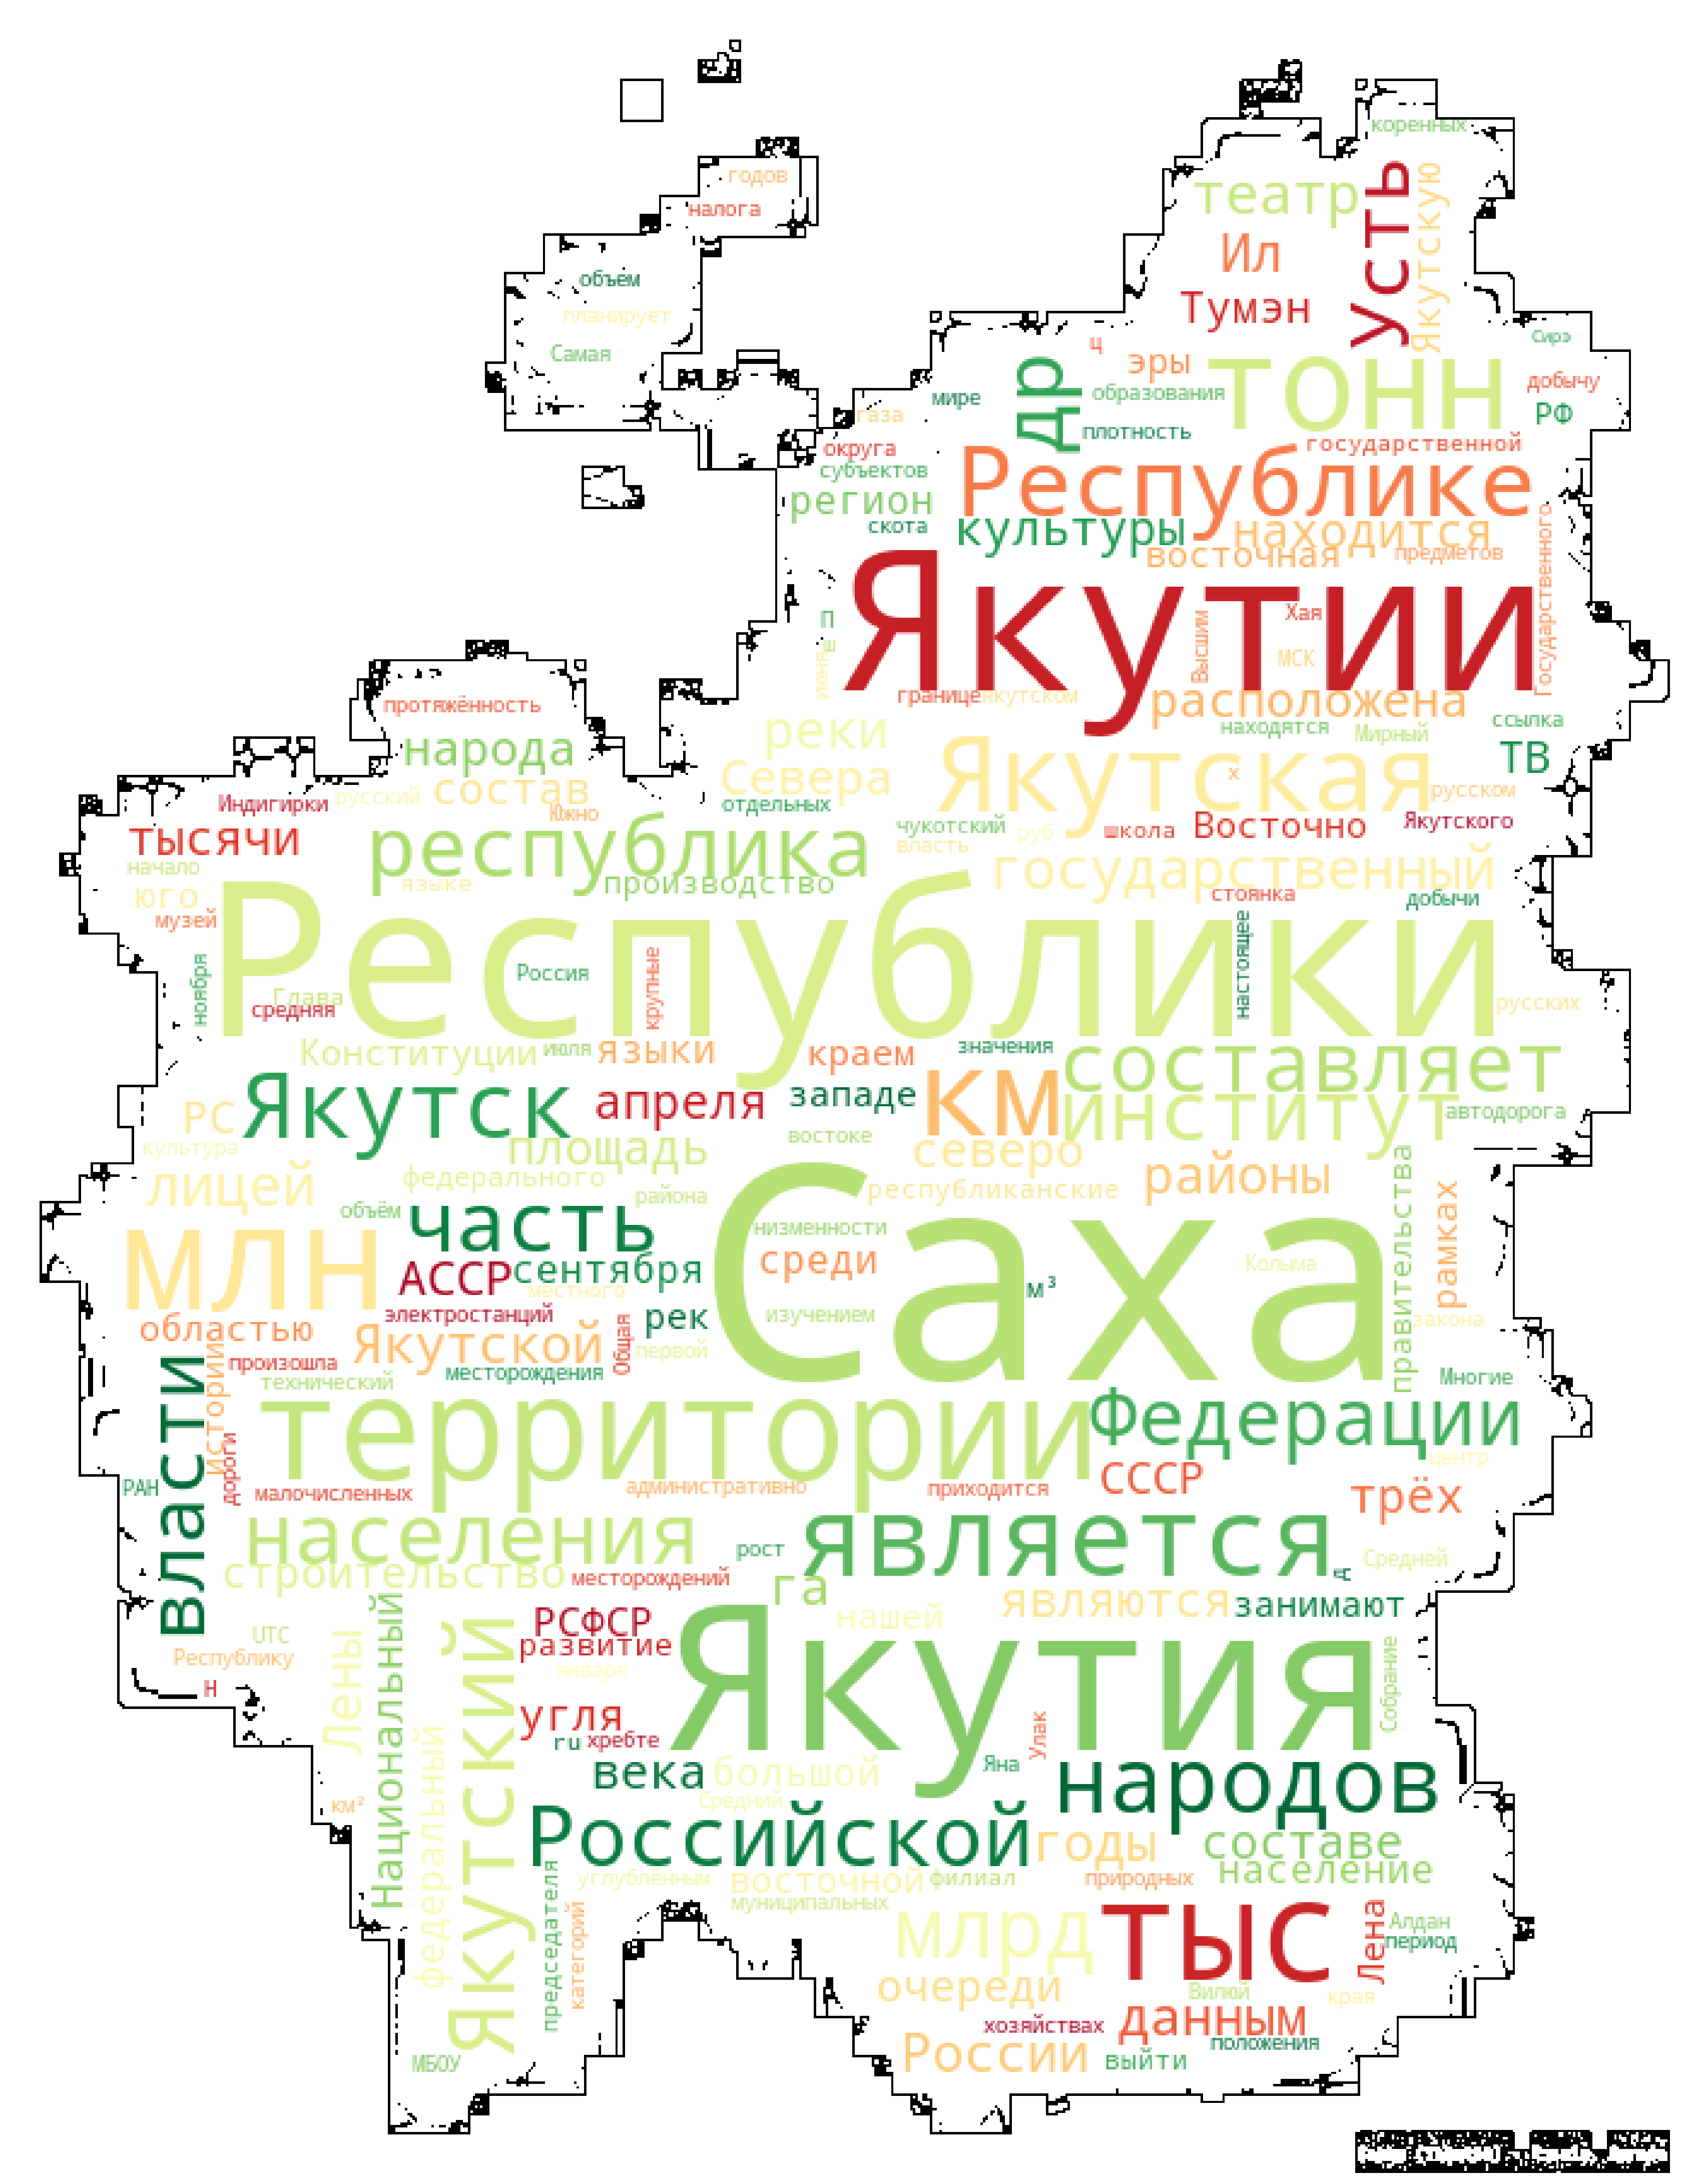

In [6]:
def generate_wordcloud(data, mask=None):
    cloud = WordCloud(
                      colormap='RdYlGn',
                      mask=shape,
                      background_color='white',
                      stopwords=stoplist,
                      collocations=False,
                      contour_color='black',
                      contour_width=1).generate_from_text(data)
    plt.figure(figsize=(100,80))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
         
generate_wordcloud(text, mask=shape)